In [1]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install numpy cftime xarray

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import xarray as xr
import os

# Define the path to your forecast data directory
data_path = '/nfs/turbo/seas-dannes/urop-2024-bias/cfs-forecasts/archive/20120101/'

# List all files in the directory
files = os.listdir(data_path)
print("Files in directory:", files)

# Filter files to identify one `flxf` and one `pgbf` file
flxf_files = [f for f in files if 'flxf' in f]
pgbf_files = [f for f in files if 'pgbf' in f]

# Print identified files
print("FLX Files:", flxf_files)
print("PGP Files:", pgbf_files)

# Select one `flxf` and one `pgbf` file to inspect
flxf_file = os.path.join(data_path, flxf_files[0])
pgbf_file = os.path.join(data_path, pgbf_files[0])

print(f"Selected FLXF file: {flxf_file}")
print(f"Selected PGBF file: {pgbf_file}")

# Load the datasets
flxf_ds = xr.open_dataset(flxf_file)
pgbf_ds = xr.open_dataset(pgbf_file)

# Print dataset summaries
print(flxf_ds)
print(pgbf_ds)

Files in directory: ['pgbf.01.2012010100.allmonths.cnbs.nc', 'flxf.01.2012010118.allmonths.cnbs.nc', 'flxf.01.2012010100.allmonths.cnbs.nc', 'pgbf.01.2012010112.allmonths.cnbs.nc', 'pgbf.01.2012010118.allmonths.cnbs.nc', 'pgbf.01.2012010106.allmonths.cnbs.nc', 'flxf.01.2012010106.allmonths.cnbs.nc', 'flxf.01.2012010112.allmonths.cnbs.nc']
FLX Files: ['flxf.01.2012010118.allmonths.cnbs.nc', 'flxf.01.2012010100.allmonths.cnbs.nc', 'flxf.01.2012010106.allmonths.cnbs.nc', 'flxf.01.2012010112.allmonths.cnbs.nc']
PGP Files: ['pgbf.01.2012010100.allmonths.cnbs.nc', 'pgbf.01.2012010112.allmonths.cnbs.nc', 'pgbf.01.2012010118.allmonths.cnbs.nc', 'pgbf.01.2012010106.allmonths.cnbs.nc']
Selected FLXF file: /nfs/turbo/seas-dannes/urop-2024-bias/cfs-forecasts/archive/20120101/flxf.01.2012010118.allmonths.cnbs.nc
Selected PGBF file: /nfs/turbo/seas-dannes/urop-2024-bias/cfs-forecasts/archive/20120101/pgbf.01.2012010100.allmonths.cnbs.nc
<xarray.Dataset>
Dimensions:            (time: 10, latitude: 18

In [25]:
pip install deepsensor

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from deepsensor.data import DataProcessor
data_processor = DataProcessor(x1_name="latitude", x2_name="longitude")
print(data_processor) # normalize the data

DataProcessor with normalisation params:
{'coords': {'time': {'name': 'time'},
            'x1': {'map': None, 'name': 'latitude'},
            'x2': {'map': None, 'name': 'longitude'}}}


In [3]:
normalized = data_processor(flxf_ds)
print(normalized)

<xarray.Dataset>
Dimensions:            (time: 10, x1: 181, x2: 360)
Coordinates:
  * time               (time) datetime64[ns] 2012-01-01T18:00:00 ... 2012-10-...
  * x1                 (x1) float64 0.0 0.002786 0.005571 ... 0.4986 0.5014
  * x2                 (x2) float64 0.0 0.002786 0.005571 ... 0.9944 0.9972 1.0
Data variables:
    SHTFL_surface      (time, x1, x2) float32 -0.5065 -0.5065 ... -0.7371
    LHTFL_surface      (time, x1, x2) float32 -1.134 -1.134 ... -1.074 -1.074
    TMP_2maboveground  (time, x1, x2) float32 -1.586 -1.586 ... -0.9923 -0.9923
Attributes:
    Conventions:          COARDS
    History:              Tue Oct 22 13:00:20 2024: /usr/bin/ncrcat -O flxf.0...
    GRIB2_grid_template:  0
    NCO:                  netCDF Operators version 4.8.1 (Homepage = http://n...


In [4]:
from deepsensor.data import TaskLoader
task_loader = TaskLoader(context = normalized["LHTFL_surface"], target = normalized["LHTFL_surface"]) 
print(task_loader) # creating a task_loader with the context and target set both being the Latent Heat Flux at the surface

TaskLoader(1 context sets, 1 target sets)
Context variable IDs: (('LHTFL_surface',),)
Target variable IDs: (('LHTFL_surface',),)


In [12]:
import pandas as pd
task = task_loader("2012-05-01T18:00:00", context_sampling=100, target_sampling=1000)
print(task) # creating a task with the target time 2012-05-01 at 18:00:00, random sampling 100 points from the context set and 1000 points for the target set

time: 2012-05-01 18:00:00
ops: []
X_c: [(2, 100)]
Y_c: [(1, 100)]
X_t: [(2, 1000)]
Y_t: [(1, 1000)]



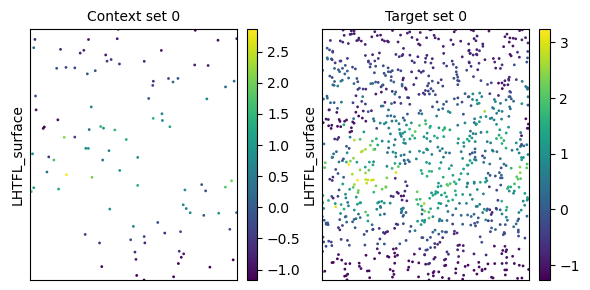

In [15]:
# spatial interpolation
import deepsensor
import matplotlib.pyplot as plt
deepsensor.plot.task(task, task_loader)
plt.show()
# Left panel: context set: Each dot represents a sampled observation, colored according to its LHTFL_surface value
# Right panel: target set: Each dot corresponds to a location for prediction, also colored by its LHTFL_surface value.
# x-axis: latitude, y-axis: longtitude